In [2]:
%load_ext autoreload
%autoreload 1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


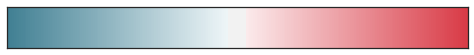

In [3]:
# base libs
import numpy as np
import pandas as pd

pd.options.display.max_columns = 500
pd.options.display.max_rows = 100

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style='white')
cmap = sns.choose_diverging_palette(as_cmap=True)

In [4]:
%aimport dasci.data.explore

import dasci.data.explore as expl

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
df_encoded = encode(df)

X = df_encoded.drop("SalePrice", axis=1)
y = df_encoded["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

numerical_features = df.select_dtypes(exclude = ["object"]).columns.tolist()
numerical_features.remove("SalePrice")

scaler = StandardScaler()
X_train.loc[:, numerical_features] = scaler.fit_transform(X_train.loc[:, numerical_features])
print(scaler.scale_)
X_test.loc[:, numerical_features] = scaler.transform(X_test.loc[:, numerical_features])

In [ ]:
pca = PCA()
pca.fit(X_train)

In [ ]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cumulative_explained_variance)), cumulative_explained_variance)

In [ ]:
next(i for (i, e) in enumerate(pca.explained_variance_ratio_) if e < 0.0005)

In [ ]:
pca = PCA(n_components=89)
PCA_X_train = pca.fit_transform(X_train)
PCA_X_test = pca.transform(X_test)

print(PCA_X_train.shape)
print(PCA_X_test.shape)

In [ ]:
columns = [f"PC{i}" for i in range(PCA_X_train.shape[1])]
PCA_X_train = pd.DataFrame(PCA_X_train, columns=columns)
PCA_X_test = pd.DataFrame(PCA_X_test, columns=columns)

In [6]:
df = pd.read_pickle(expl.full_path_name(r'output\train-fe-basic.pickle'))

In [11]:
df.to_pickle(r"output\train-fe-pca.pickle")